In [280]:
%matplotlib inline

import pyaudio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram

def play_sound(x, amp=0.5):

    p = pyaudio.PyAudio()
    # for paFloat32 sample values must be in range [-1.0, 1.0]
    stream = p.open(format=pyaudio.paFloat32,
                    channels=1,
                    rate=fs,
                    output=True)

    # play. May repeat with different volume values (if done interactively) 
    stream.write(amp*x)
    stream.stop_stream()
    stream.close()
    p.terminate()
    pass


def find_nearest(array, value):
    idx = (np.abs(array-value)).argmin()
    return idx


def make_sound(f, fs=44100, duration=1.0):
    # generate samples, note conversion to float32 array
    x = (np.sin(2*np.pi*np.arange(fs*duration)*f/fs)).astype(np.float32)
    return x


def make_AM_sound(f, amp_modulator, fs=44100, duration=1.0):
    # generate samples, note conversion to float32 array
    x = make_sound(f, fs, duration)
    x = np.multiply(x, amp_modulator)
    return x


def make_FM_sound(f, freq_modulator, fs=44100, duration=1.0):
    # generate samples, note conversion to float32 array
    fs = float(fs)
    x = (np.sin(2*np.pi*np.arange(fs*duration)*np.multiply(f/fs, freq_modulator))).astype(np.float32)
    return x


def complex_tone(freqs, amps, duration):
   # make tone
    tones = list()
    for amp, f in zip(amps, freqs):
        tones.append(make_sound(f, fs=fs, duration=duration)*amp)
    tone = np.array(tones).sum(0)  # sum the frequencies together
    return tone


def power_to_db(power, conversion_val=10):
    '''
    This is the conversion from power -> dB, as taken from a stack exchange forum.
    '''
    return conversion_val*np.log10(power)


def db_to_power(db, conversion_val=10):
    '''
    This is the conversion from dB -> power, as also taken from a stack exchange forum.
    '''
    return 10 ** (db/conversion_val)


def get_fft_half(tone, fs):
    power = np.abs(np.fft.fft(tone))
    n = len(power)
    freq = np.fft.fftfreq(n, 1/float(fs))

    # just get first half of spectrum
    half_n = int(np.ceil(n/2.0))
#     power = (2.0 / n) * power[:half_n]
    power = power[:half_n]
    freq_half = freq[:half_n]
    return power, freq_half


def get_db(tone, fs):

    N = 8192  # not sure where this comes from ... :/
    win = np.hamming(N)                                                       
    x = tone[0:N] * win                             # Take a slice and multiply by a window

    sp = np.fft.rfft(x)                               # Calculate real FFT (this just means the first half)

    mag = np.abs(sp) 
    ref = np.sum(win) / 2                             # Reference : window sum and factor of 2
                                                      # because we are using half of FFT spectrum

    s_dbfs = 20 * np.log10(mag / ref)                 # Convert to dBFS
    
    freq = np.fft.fftfreq(N, 1/float(fs))
    half_n = int(np.ceil(N/2.0))  # not sure about N
    freq_half = freq[:half_n+1]
    
    return s_dbfs, freq_half


def plot_wave_and_fft(tone, fs, t_max, freq_max, power_max):
    # plot waveform
    f, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(tone)
    axs[0].set_xlim([0, t_max])
    axs[0].set_xlabel('Time (ms)')
    axs[0].set_ylabel('Amplitude')

    # get fft
    power, freq_half = get_fft_half(tone, fs)

    # plot fft
    axs[1].plot(freq_half, power, lw=4, c='k')
    axs[1].set_xlim([0, freq_max])
    axs[1].set_ylim([0, power_max])
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('Power')
    return f


def plot_wave_and_db(tone, fs, t_max, freq_max):
    # plot waveform
    f, axs = plt.subplots(1, 2, figsize=(15, 5))
    axs[0].plot(tone)
    axs[0].set_xlim([0, t_max])
    axs[0].set_xlabel('Time (ms)')
    axs[0].set_ylabel('Amplitude')

    # get fft
    db, freq_half = get_db(tone, fs)

    # plot fft
    axs[1].plot(freq_half, power_to_db(power), lw=4, c='k')
    axs[1].set_xlim([0, freq_max])
    axs[1].set_xlabel('Frequency (Hz)')
    axs[1].set_ylabel('dB')
    return f


def expspace(start, stop, num, density='natural'):
    lin = np.linspace(np.sqrt(start), np.sqrt(stop), num)
    if density == 'natural':
        return lin**2
    elif density == 'flip':
        shift = stop+start
        return (shift-(lin**2))[::-1]

In [266]:
np.linspace(np.sqrt(start), np.sqrt(stop), num)**2

array([  0.        ,   1.2345679 ,   4.9382716 ,  11.11111111,
        19.75308642,  30.86419753,  44.44444444,  60.49382716,
        79.01234568, 100.        ])

array([  200.        ,   561.98347107,   920.66115702,  1276.03305785,
        1628.09917355,  1976.85950413,  2322.31404959,  2664.46280992,
        3003.30578512,  3338.84297521,  3671.07438017,  4000.        ,
        4325.61983471,  4647.9338843 ,  4966.94214876,  5282.6446281 ,
        5595.04132231,  5904.1322314 ,  6209.91735537,  6512.39669421,
        6811.57024793,  7107.43801653,  7400.        ,  7689.25619835,
        7975.20661157,  8257.85123967,  8537.19008264,  8813.2231405 ,
        9085.95041322,  9355.37190083,  9621.48760331,  9884.29752066,
       10143.80165289, 10400.        , 10652.89256198, 10902.47933884,
       11148.76033058, 11391.73553719, 11631.40495868, 11867.76859504,
       12100.82644628, 12330.5785124 , 12557.02479339, 12780.16528926,
       13000.        , 13216.52892562, 13429.75206612, 13639.66942149,
       13846.28099174, 14049.58677686, 14249.58677686, 14446.28099174,
       14639.66942149, 14829.75206612, 15016.52892562, 15200.        ,
      

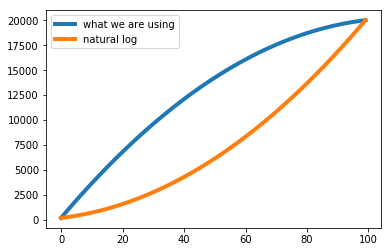

In [281]:
# demo the non-linear sampling of frequencies
plt.plot(expspace(200, 20000, 100, 'flip'), label='what we are using', lw=4)
plt.plot(expspace(200, 20000, 100, 'natural'), label='natural log', lw=4)
plt.legend()

expspace(200, 20000, 100, 'flip')

# (1) amplitude task

### for this, we use b-weighting to adjust the perceptual volume across frequencies
### the task will be for people to say whether or not a tone was present, so we can map their auditory acuity
### we will test 10 frequencies (200-20,000Hz), 5 amplitudes, with 4 repetitions

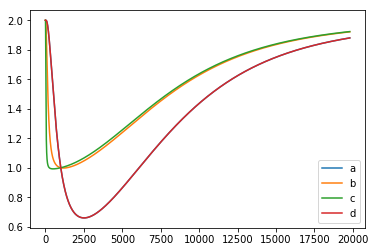

In [255]:
# which method of correcting for perceptual amplitude?
freqs = expspace(200, 20000, 18001, 'flip')

base_amp = pydsm.audio_weightings.a_weighting(freqs)
plt.plot(freqs, (1-base_amp)+1, label='a')
base_amp = pydsm.audio_weightings.b_weighting(freqs)
plt.plot(freqs, (1-base_amp)+1, label='b')
base_amp = pydsm.audio_weightings.c_weighting(freqs)
plt.plot(freqs, (1-base_amp)+1, label='c')
base_amp = pydsm.audio_weightings.a_weighting(freqs)
plt.plot(freqs, (1-base_amp)+1, label='d')
plt.legend()
plt.show()

In [257]:
import time
import pydsm  # for the adjustment between perceived amplitude and frequency
from scipy.io.wavfile import write

base_dir = '/Users/ellieabrams/Desktop/Projects/Shepard/exp/tones_final'
base_dir = '/Users/lauragwilliams/Documents/experiments/shepard/shepard/tones_pitchtask'

# params
fs=44100  # sample freq
duration=0.8
tone_length = 0.3  # desired length in seconds

# test this freq range
min_freq = 200
max_freq = 20000
n_freqs = ((max_freq - min_freq)*2)+1
n_freqs = 10
# freqs = np.linspace(min_freq, max_freq, n_freqs)
freqs = expspace(min_freq, max_freq, n_freqs, 'flip')

# we should test different amplitudes depending on the freq. we weight
# the amplitude based on standard 
base_amp = pydsm.audio_weightings.b_weighting(freqs)
amp_corrections = (1-base_amp)+1

# test this amp range
min_amp = 0
max_amp = 1
n_amps = 5

# make tones, looping through each paramtere
for amp_cor, freq in zip(amp_corrections, freqs):
    for amps in np.linspace(min_amp, max_amp, n_amps):

        # make tone
        tone = complex_tone([freq], [amps*amp_cor], duration)
        play_sound(tone[100:int(fs*tone_length)+100])
        print(freq, amps*amp_cor)

#         fname = '%s/%s-%s.wav' % (base_dir, freq, np.round(amps, 3))
#         write(fname, fs, tone[0:int(fs*tone_length)])
#         print(fname)

(3.637978807091713e-12, 0.0)
(3.637978807091713e-12, 0.5)
(3.637978807091713e-12, 1.0)
(3.637978807091713e-12, 1.5)
(3.637978807091713e-12, 2.0)
(3400.5201785479458, 0.0)
(3400.5201785479458, 0.2766749416902672)
(3400.5201785479458, 0.5533498833805344)
(3400.5201785479458, 0.8300248250708016)
(3400.5201785479458, 1.1066997667610687)
(6445.354756903349, 0.0)
(6445.354756903349, 0.3412134219224837)
(6445.354756903349, 0.6824268438449674)
(6445.354756903349, 1.023640265767451)
(6445.354756903349, 1.3648536876899349)
(9134.50373506621, 0.0)
(9134.50373506621, 0.3932951724384862)
(9134.50373506621, 0.7865903448769724)
(9134.50373506621, 1.1798855173154585)
(9134.50373506621, 1.5731806897539449)
(11467.967113036531, 0.0)
(11467.967113036531, 0.42674460588687135)
(11467.967113036531, 0.8534892117737427)
(11467.967113036531, 1.280233817660614)
(11467.967113036531, 1.7069784235474854)
(13445.744890814309, 0.0)
(13445.744890814309, 0.44700572050005566)
(13445.744890814309, 0.8940114410001113)
(1

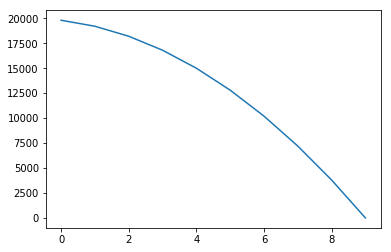

In [248]:
plt.plot(freqs)

In [175]:
semitones = np.array([624, 587, 544, 524, 494, 466, 440, 415, 392, 370, 349, 330, 311, 294, 277, 262, 247, 233, 220])
plus_minus = np.linspace(0, 10, 5)

for tone in semitones:
    for adjust in plus_minus:
                
        freq_up = tone+adjust
        freq_down = tone-adjust
        
        print(tone, adjust, freq_up, freq_down)
        
        adjusted_tone1 = complex_tone([tone], [10], 0.8)
        play_sound(adjusted_tone1)    
        adjusted_tone2 = complex_tone([freq_down], [10], 0.8)
        play_sound(adjusted_tone2)    


(624, 0.0, 624.0, 624.0)
(624, 2.5, 626.5, 621.5)
(624, 5.0, 629.0, 619.0)
(624, 7.5, 631.5, 616.5)
(624, 10.0, 634.0, 614.0)
(587, 0.0, 587.0, 587.0)
(587, 2.5, 589.5, 584.5)
(587, 5.0, 592.0, 582.0)
(587, 7.5, 594.5, 579.5)
(587, 10.0, 597.0, 577.0)
(544, 0.0, 544.0, 544.0)
(544, 2.5, 546.5, 541.5)
(544, 5.0, 549.0, 539.0)


KeyboardInterrupt: 

In [190]:
semitones = np.array([624, 587, 554, 524, 494, 466, 440, 415, 392, 370, 349, 330, 311, 294, 277, 262, 247, 233, 220])
plus_minus = np.linspace(0, 10, 5)

for ii in range(len(semitones)):
    
    # loop intil one minus the end
    if ii == len(semitones)-1:
        continue
    # pull out relevant tones
    tone_0 = semitones[ii]
    tone_1 = semitones[ii+1]
    
    # get thirds differnce in freq between the tones
    freq_diff = (tone_0 - tone_1)/4.
    
    for jj in range(4):
        adjustment = freq_diff*jj
        this_tone = [tone_0 - adjustment]
        print(this_tone)
        adjusted_tone1 = complex_tone(this_tone, [10], 0.8)
        play_sound(adjusted_tone1)    



[624.0]
[614.75]
[605.5]
[596.25]
[587.0]
[578.75]
[570.5]
[562.25]
[554.0]
[546.5]
[539.0]
[531.5]
[524.0]
[516.5]
[509.0]
[501.5]
[494.0]
[487.0]
[480.0]
[473.0]
[466.0]
[459.5]
[453.0]
[446.5]
[440.0]
[433.75]
[427.5]
[421.25]
[415.0]
[409.25]
[403.5]
[397.75]
[392.0]
[386.5]
[381.0]
[375.5]
[370.0]
[364.75]
[359.5]
[354.25]
[349.0]
[344.25]
[339.5]
[334.75]
[330.0]
[325.25]
[320.5]
[315.75]
[311.0]
[306.75]
[302.5]
[298.25]
[294.0]
[289.75]
[285.5]
[281.25]
[277.0]
[273.25]
[269.5]
[265.75]
[262.0]
[258.25]
[254.5]
[250.75]
[247.0]
[243.5]
[240.0]
[236.5]
[233.0]
[229.75]
[226.5]
[223.25]


In [212]:
(len(semitones) * 5 * 4)

380

In [213]:
10 * 5 * 5

250

In [181]:
freq_diff

14.333333333333334

In [176]:
13/4.

3.25

In [207]:
adjusted_tone1 = complex_tone([624], [10], 0.8)
play_sound(adjusted_tone1)    
adjusted_tone2 = complex_tone([587], [10], 0.8)
play_sound(adjusted_tone2)   

# adjusted_tone1 = complex_tone([440], [15], 0.8)
# play_sound(adjusted_tone1)    
# adjusted_tone2 = complex_tone([446], [15], 0.8)
# play_sound(adjusted_tone2)   

IndexError: arrays used as indices must be of integer (or boolean) type

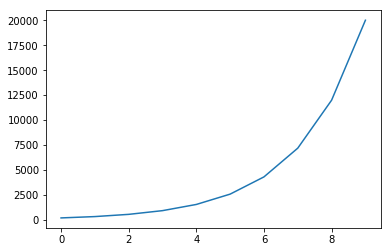

In [78]:
plt.plot(np.geomspace(200, 20000, 10))

freqs = np.linspace(min_freq, max_freq, max_freq-min_freq)
freqs[np.geomspace(1, len(freqs), 10)]

array([20000.        , 19963.98019641, 19927.99285772, 19892.03798393,
       19856.11557503, 19820.22563104, 19784.36815194, 19748.54313773,
       19712.75058843, 19676.99050402, 19641.26288451, 19605.56772989,
       19569.90504018, 19534.27481536, 19498.67705543, 19463.11176041,
       19427.57893028, 19392.07856505, 19356.61066472, 19321.17522928,
       19285.77225875, 19250.4017531 , 19215.06371236, 19179.75813651,
       19144.48502557, 19109.24437951, 19074.03619836, 19038.8604821 ,
       19003.71723074, 18968.60644428, 18933.52812272, 18898.48226605,
       18863.46887428, 18828.48794741, 18793.53948543, 18758.62348835,
       18723.73995617, 18688.88888889, 18654.0702865 , 18619.28414901,
       18584.53047642, 18549.80926873, 18515.12052593, 18480.46424803,
       18445.84043503, 18411.24908692, 18376.69020372, 18342.16378541,
       18307.66983199, 18273.20834348, 18238.77931986, 18204.38276114,
       18170.01866732, 18135.68703839, 18101.38787436, 18067.12117523,
      

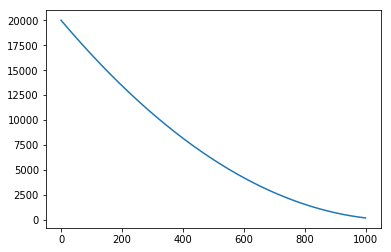

In [214]:


plt.plot(expspace(200, 20000, 1000, 'flip'))
expspace(200, 20000, 1000, 'flip')

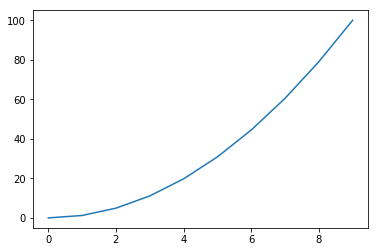

In [158]:
start = 0
stop = 100
num = 10

plt.plot(np.linspace(np.sqrt(start), np.sqrt(stop), num)**2)

In [151]:
np.round(101-np.geomspace(1, 400, 100))

array([ 100.,  100.,  100.,  100.,  100.,  100.,  100.,   99.,   99.,
         99.,   99.,   99.,   99.,   99.,   99.,   99.,   98.,   98.,
         98.,   98.,   98.,   97.,   97.,   97.,   97.,   96.,   96.,
         96.,   96.,   95.,   95.,   94.,   94.,   94.,   93.,   93.,
         92.,   92.,   91.,   90.,   90.,   89.,   88.,   88.,   87.,
         86.,   85.,   84.,   83.,   82.,   80.,   79.,   78.,   76.,
         75.,   73.,   71.,   70.,   68.,   65.,   63.,   61.,   58.,
         56.,   53.,   50.,   47.,   43.,   40.,   36.,   32.,   28.,
         23.,   18.,   13.,    7.,    2.,   -5.,  -11.,  -18.,  -26.,
        -34.,  -42.,  -51.,  -60.,  -70.,  -81.,  -92., -105., -117.,
       -131., -145., -161., -177., -195., -213., -233., -253., -276.,
       -299.])

In [63]:
((10 * 5 * 5)*.5) / 60

2.0833333333333335

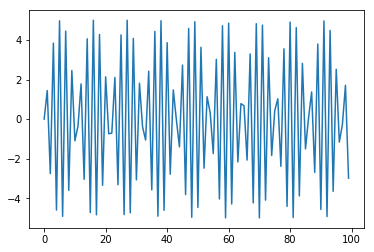

In [20]:
plt.plot(tone[0:int(fs*tone_length)][0:100])